# AIML Online Capstone - Pneumonia Detection Challenge:
# MobileNet Model

# By G. Krishna Kumar, G. Karthikeyan, K. Sailesh Prabhas;

# Import the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import cv2
from zipfile import ZipFile
import os
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm as tqdm
#Tensorboard

# Extract Code for the local purpose to get only file names of the .dcm files

In [2]:
PathDicom = "./rsna_pneumonia_detection_challenge/stage_2_train_images/"
lstFilesDCM_train = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM_train.append((filename))

In [3]:
len(lstFilesDCM_train)

26684

# Creating the JPG images from the Train set

#Converting the images to a jpg format is a one time activity, which has been compleated

In [ ]:
# with ZipFile('/Users/sk665824/Desktop/Great Learning/CapstoneProject/stage_2_train_images.zip', 'r') as f:
#     for name in tqdm(f.namelist()):
#         x=f.extract(name)
#         dataset = pydicom.dcmread(x)
#         img2=dataset.pixel_array
#         name=name.split('.')[0]
#     #print (name)
#         cv2.imwrite(f"/Users/sk665824/Desktop/Great Learning/CapstoneProject/stage_2_train_jpg/{name}.jpg",img2) # create a folder stage_2_train_jpg

# Creating the JPG images from the Test set

In [ ]:
# with ZipFile('/Users/sk665824/Desktop/Great Learning/CapstoneProject/stage_2_test_images.zip', 'r') as f:
#     for name in tqdm(f.namelist()):
#         x=f.extract(name)
#         dataset = pydicom.dcmread(x)
#         img2=dataset.pixel_array
#         name=name.split('.')[0]
#         cv2.imwrite(f"/Users/sk665824/Desktop/Great Learning/CapstoneProject/stage_2_test_jpg/{name}.jpg",img2) # create a folder xray2

# Reading the combined metadata file

In [4]:
minfo = pd.read_csv('metadata_train_new.csv')

In [5]:
minfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientid     26684 non-null  object 
 1   dob           0 non-null      float64
 2   gender        26684 non-null  object 
 3   age           26684 non-null  int64  
 4   bodypart      26684 non-null  object 
 5   viewposition  26684 non-null  object 
 6   rows          26684 non-null  int64  
 7   columns       26684 non-null  int64  
 8   opacityclass  26684 non-null  object 
 9   class         26684 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 2.0+ MB


# Items are in Markdown and DO NOT REQUIRED

meta_pne = minfo.loc[minfo['class']==1]

print(len(meta_pne))

meta_pne1 = minfo.loc[minfo['class']==0]
print(len(meta_pne1))

meta_pne.info()

In [6]:
mydata=minfo[0:26684]

In [7]:
mydata.head()

,patientid,dob,gender,age,bodypart,viewposition,rows,columns,opacityclass,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,F,51,CHEST,PA,1024,1024,No Lung Opacity / Not Normal,0
1,000924cf-0f8d-42bd-9158-1af53881a557,NaN,F,19,CHEST,AP,1024,1024,Normal,0
2,000db696-cf54-4385-b10b-6b16fbb3f985,NaN,F,25,CHEST,AP,1024,1024,Lung Opacity,1
3,000fe35a-2649-43d4-b027-e67796d412e0,NaN,M,40,CHEST,AP,1024,1024,Lung Opacity,1
4,001031d9-f904-4a23-b3e5-2c088acd19c6,NaN,M,57,CHEST,PA,1024,1024,Lung Opacity,1


In [8]:
mydata.shape

(26684, 10)

# Converting the .dcm images to .jpg and resizing them to 224 * 224 size.

In [9]:
#mydata containg the data which is of class = 1 - Working code of Krishna, tweaked code is in below cell.

train_image=[]

for ind in tqdm(mydata.index):
  # clas=class_data2['class'][ind]
  # if(clas==1):
    patient_id=mydata['patientid'][ind]
    #img=cv2.imread(f"/content/drive/My Drive/Project_Pneumonia_Detection/xray_train/{patient_id}.jpg")
    img=cv2.imread(f"/Users/sk665824/Desktop/Great Learning/CapstoneProject/stage_2_train_jpg/{patient_id}.jpg")
    img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

    train_image.append(img)
train_image=np.array(train_image)

100%|██████████| 26684/26684 [03:23<00:00, 131.42it/s]


In [10]:
print(train_image.shape)

(26684, 224, 224, 3)


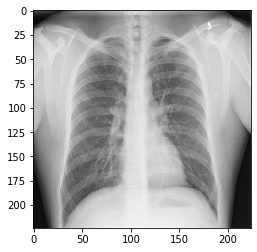

In [11]:
plt.imshow(train_image[201])

# Create a dataframe for labels and replace NaN with 0's

In [12]:
label_data=pd.read_csv('/Users/sk665824/Desktop/Great Learning/CapstoneProject/rsna_pneumonia_detection_challenge/stage_2_train_labels.csv')

In [13]:
label_data=label_data.replace(np.nan,0)

In [14]:
label_data.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


# Creating a X_Train & Y_Train(masks) to provide them as an input to MobileNet.

In [15]:
train_mask=[]
pid=[]

scale=224/1024
for ind in tqdm(mydata.index): # class_data2 replaced with mydata
    clas=mydata['class'][ind]

  #if(clas==1):
    patient_id=mydata['patientid'][ind]
    
    pid.append(patient_id)
    ld=label_data.loc[label_data['patientId'] == patient_id]
   
    z=np.zeros((224,224),np.uint8)
    z=np.array(z,dtype=float)
    for ind in tqdm(ld.index):
      xmin=ld['x'][ind]*scale
      ymin=ld['y'][ind]*scale
      width=ld['width'][ind]*scale
      height=ld['height'][ind]*scale
      target=ld['Target'][ind]
      z[int(ymin):int(ymin+height), int(xmin):int(xmin+width)] = 1
    train_mask.append(z)
    
# Changing it to Array.
train_mask=np.array(train_mask)

100%|██████████| 1/1 [00:00<00:00, 1379.71it/s]

100%|██████████| 1/1 [00:00<00:00, 2079.48it/s]

100%|██████████| 2/2 [00:00<00:00, 3951.30it/s]

100%|██████████| 2/2 [00:00<00:00, 2751.27it/s]

100%|██████████| 2/2 [00:00<00:00, 1610.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1767.51it/s]

100%|██████████| 1/1 [00:00<00:00, 2011.66it/s]

100%|██████████| 2/2 [00:00<00:00, 2404.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1712.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1587.55it/s]

100%|██████████| 1/1 [00:00<00:00, 1666.39it/s]

100%|██████████| 1/1 [00:00<00:00, 1766.77it/s]

100%|██████████| 2/2 [00:00<00:00, 2624.72it/s]

100%|██████████| 1/1 [00:00<00:00, 1548.28it/s]

100%|██████████| 1/1 [00:00<00:00, 1592.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1709.17it/s]

100%|██████████| 2/2 [00:00<00:00, 2074.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1154.82it/s]

100%|██████████| 1/1 [00:00<00:00, 1540.89it/s]

100%|██████████| 1/1 [00:00<00:00, 1785.57it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2222.74it/s]

100%|██████████| 1/1 [00:00<00:00, 1579.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1842.03it/s]

100%|██████████| 2/2 [00:00<00:00, 2910.69it/s]

100%|██████████| 1/1 [00:00<00:00, 1804.78it/s]

100%|██████████| 2/2 [00:00<00:00, 3412.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1941.81it/s]

100%|██████████| 1/1 [00:00<00:00, 2268.42it/s]

100%|██████████| 1/1 [00:00<00:00, 2398.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1253.15it/s]

100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]

100%|██████████| 2/2 [00:00<00:00, 3846.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1927.53it/s]

100%|██████████| 1/1 [00:00<00:00, 2058.05it/s]

100%|██████████| 1/1 [00:00<00:00, 2409.13it/s]

100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2207.53it/s]

100%|██████████| 2/2 [00:00<00:00, 3220.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1545.43it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 3874.65it/s]

100%|██████████| 2/2 [00:00<00:00, 2733.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1567.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2057.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2202.89it/s]

100%|██████████| 1/1 [00:00<00:00, 1834.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1949.03it/s]

100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]

100%|██████████| 2/2 [00:00<00:00, 3305.20it/s]

100%|██████████| 1/1 [00:00<00:00, 2357.68it/s]

100%|██████████| 1/1 [00:00<00:00, 1686.49it/s]

100%|██████████| 2/2 [00:00<00:00, 3514.29it/s]

100%|██████████| 2/2 [00:00<00:00, 3644.05it/s]

100%|██████████| 2/2 [00:00<00:00, 2881.69it/s]

100%|██████████| 1/1 [00:00<00:00, 1438.38it/s]

100%|██████████| 1/1 [00:00<00:00, 2277.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2222.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2316.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1420.83it/s]

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 2/2

100%|██████████| 1/1 [00:00<00:00, 2049.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1717.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2207.53it/s]

100%|██████████| 2/2 [00:00<00:00, 2180.56it/s]

100%|██████████| 1/1 [00:00<00:00, 2208.69it/s]

100%|██████████| 1/1 [00:00<00:00, 2174.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2201.73it/s]

100%|██████████| 1/1 [00:00<00:00, 1995.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2118.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1689.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1435.42it/s]

100%|██████████| 2/2 [00:00<00:00, 2860.08it/s]

100%|██████████| 2/2 [00:00<00:00, 2746.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1996.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2208.69it/s]

100%|██████████| 1/1 [00:00<00:00, 2416.07it/s]

100%|██████████| 1/1 [00:00<00:00, 2170.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2142.14it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1404.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1605.17it/s]

100%|██████████| 1/1 [00:00<00:00, 1718.27it/s]

100%|██████████| 1/1 [00:00<00:00, 1763.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1709.17it/s]

100%|██████████| 1/1 [00:00<00:00, 2189.09it/s]

100%|██████████| 1/1 [00:00<00:00, 1464.49it/s]

100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]

100%|██████████| 1/1 [00:00<00:00, 2175.47it/s]

100%|██████████| 1/1 [00:00<00:00, 2062.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1547.71it/s]

100%|██████████| 2/2 [00:00<00:00, 2765.78it/s]

100%|██████████| 2/2 [00:00<00:00, 2491.42it/s]

100%|██████████| 1/1 [00:00<00:00, 1293.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]

100%|██████████| 2/2 [00:00<00:00, 3383.87it/s]

100%|██████████| 1/1 [00:00<00:00, 827.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2427.26it/s]

100%|██████████| 1/1 [00:00<00:00, 1769.75it/s]

100%|██████████| 1/1 

100%|██████████| 1/1 [00:00<00:00, 2040.03it/s]

100%|██████████| 1/1 [00:00<00:00, 2000.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1908.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1347.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1422.28it/s]

100%|██████████| 2/2 [00:00<00:00, 3385.23it/s]

100%|██████████| 1/1 [00:00<00:00, 1783.29it/s]

100%|██████████| 1/1 [00:00<00:00, 1933.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1842.03it/s]

100%|██████████| 2/2 [00:00<00:00, 23.98it/s]

100%|██████████| 2/2 [00:00<00:00, 2688.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1477.39it/s]

100%|██████████| 2/2 [00:00<00:00, 2105.05it/s]

100%|██████████| 1/1 [00:00<00:00, 1712.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1845.27it/s]

100%|██████████| 1/1 [00:00<00:00, 1718.98it/s]

100%|██████████| 1/1 [00:00<00:00, 1941.81it/s]

100%|██████████| 1/1 [00:00<00:00, 1811.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1689.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2168.72it/s]

100%|██████████| 1/1 [

100%|██████████| 1/1 [00:00<00:00, 2036.07it/s]

100%|██████████| 1/1 [00:00<00:00, 1760.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2156.45it/s]

100%|██████████| 1/1 [00:00<00:00, 2007.80it/s]

100%|██████████| 1/1 [00:00<00:00, 2065.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1861.65it/s]

100%|██████████| 2/2 [00:00<00:00, 2265.35it/s]

100%|██████████| 2/2 [00:00<00:00, 2717.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1938.22it/s]

100%|██████████| 2/2 [00:00<00:00, 2621.44it/s]

100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]

100%|██████████| 2/2 [00:00<00:00, 2797.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1677.72it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2004.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1938.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2141.04it/s]

100%|██████████| 2/2 [00:00<00:00, 2735.12it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1754.20it/s]

100%|██████████| 2/2 [00:00<00:00, 2699.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1567.38it/s]

100%|██████████| 1/1 [00:00<00:00, 2149.82it/s]

100%|██████████| 1/1 [00:00<00:00, 1779.51it/s]

100%|██████████| 2/2 [00:00<00:00, 2209.85it/s]

100%|██████████| 1/1 [00:00<00:00, 2136.68it/s]

100%|██████████| 1/1 [00:00<00:00, 1466.54it/s]

100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1828.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1949.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2204.05it/s]

100%|██████████| 2/2 [00:00<00:00, 2981.03it/s]

100%|██████████| 2/2 [00:00<00:00, 2736.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1720.39it/s]

100%|██████████| 2/2 [00:00<00:00, 3247.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2792.48it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1862.48it/s]

100%|██████████| 1/1 [00:00<00:00, 1802.45it/s]

100%|██████████| 1/1 [00:00<00:00, 2201.73it/s]

100%|██████████| 2/2 [00:00<00:00, 1836.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2144.33it/s]

100%|██████████| 1/1 [00:00<00:00, 2391.28it/s]

100%|██████████| 1/1 [00:00<00:00, 2434.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]

100%|██████████| 1/1 [00:00<00:00, 2246.55it/s]

100%|██████████| 1/1 [00:00<00:00, 1689.89it/s]

100%|██████████| 1/1 [00:00<00:00, 2114.06it/s]

100%|██████████| 1/1 [00:00<00:00, 1615.06it/s]

100%|██████████| 1/1 [00:00<00:00, 1848.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1987.82it/s]

100%|██████████| 1/1 [00:00<00:00, 1802.45it/s]

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1953.56it/s]

100%|██████████| 1/1 [00:00<00:00, 2221.56it/s]

100%|██████████| 2/2 [00:00<00:00, 3356.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1798.59it/s]

100%|██████████| 2/2

100%|██████████| 2/2 [00:00<00:00, 3883.61it/s]

100%|██████████| 2/2 [00:00<00:00, 2993.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]

100%|██████████| 1/1 [00:00<00:00, 2898.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2070.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]

100%|██████████| 1/1 [00:00<00:00, 2368.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1972.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 2/2 [00:00<00:00, 3110.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1766.77it/s]

100%|██████████| 2/2 [00:00<00:00, 3165.51it/s]

100%|██████████| 1/1 [00:00<00:00, 1349.52it/s]

100%|██████████| 1/1 [00:00<00:00, 1842.03it/s]

100%|██████████| 2/2 [00:00<00:00, 2958.94it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 3/3 [00:00<00:00, 4315.13it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2213.35it/s]

100%|██████████| 1/1 [00:00<00:00, 2227.46it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 3515.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2242.94it/s]

100%|██████████| 1/1 [00:00<00:00, 1649.35it/s]

100%|██████████| 2/2 [00:00<00:00, 3429.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2110.87it/s]

100%|██████████| 2/2 [00:00<00:00, 3300.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2294.48it/s]

100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1811.79it/s]

100%|██████████| 2/2 [00:00<00:00, 2957.90it/s]

100%|██████████| 1/1 [00:00<00:00, 2189.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2169.84it/s]

100%|██████████| 1/1 [00:00<00:00, 2256.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2362.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2003.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1944.51it/s]

100%|██████████| 2/2 [00:00<00:00, 3148.88it/s]

100%|██████████| 1/1 [00:00<00:00, 1513.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1849.34it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 2949.58it/s]

100%|██████████| 1/1 [00:00<00:00, 1504.41it/s]

100%|██████████| 1/1 [00:00<00:00, 2192.53it/s]

100%|██████████| 1/1 [00:00<00:00, 2380.42it/s]

100%|██████████| 1/1 [00:00<00:00, 1631.39it/s]

100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1989.71it/s]

100%|██████████| 1/1 [00:00<00:00, 1798.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1791.67it/s]

100%|██████████| 1/1 [00:00<00:00, 1818.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1919.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1481.56it/s]

100%|██████████| 1/1 [00:00<00:00, 1908.24it/s]

100%|██████████| 2/2 [00:00<00:00, 2631.31it/s]

100%|██████████| 1/1 [00:00<00:00, 2091.92it/s]

100%|██████████| 1/1 [00:00<00:00, 1669.71it/s]

100%|██████████| 2/2 [00:00<00:00, 1954.93it/s]

100%|██████████| 2/2 [00:00<00:00, 3407.23it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1776.49it/s]

100%|██████████| 1/1 [00:00<00:00, 2168.72it/s]

100%|██████████| 1/1 [00:00<00:00, 2037.06it/s]

100%|██████████| 1/1 [00:00<00:00, 1625.70it/s]

100%|██████████| 1/1 [00:00<00:00, 1775.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2321.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1964.55it/s]

100%|██████████| 2/2 [00:00<00:00, 2267.80it/s]

100%|██████████| 1/1 [00:00<00:00, 1905.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1623.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2028.19it/s]

100%|██████████| 1/1 [00:00<00:00, 1861.65it/s]

100%|██████████| 1/1 [00:00<00:00, 2007.80it/s]

100%|██████████| 1/1 [00:00<00:00, 1479.47it/s]

100%|██████████| 1/1 [00:00<00:00, 1644.83it/s]

100%|██████████| 1/1 [00:00<00:00, 1843.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1632.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2238.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2227.46it/s]

100%|██████████| 1/1 [00:00<00:00, 1721.80it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2272.10it/s]

100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1217.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]

100%|██████████| 1/1 [00:00<00:00, 2814.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1678.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2480.37it/s]

100%|██████████| 1/1 [00:00<00:00, 2416.07it/s]

100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]

100%|██████████| 1/1 [00:00<00:00, 2723.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]

100%|██████████| 1/1 [00:00<00:00, 1636.48it/s]

100%|██████████| 1/1 [00:00<00:00, 1457.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1112.25it/s]

100%|██████████| 1/1 [00:00<00:00, 1032.06it/s]

100%|██████████| 2/2 [00:00<00:00, 3459.22it/s]

100%|██████████| 2/2 [00:00<00:00, 3278.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2122.62it/s]

100%|██████████| 2/2 [00:00<00:00, 3154.80it/s]

100%|██████████| 1/1 [00:00<00:00, 2222.74it/s]

100%|██████████| 2/2

100%|██████████| 1/1 [00:00<00:00, 2142.14it/s]

100%|██████████| 2/2 [00:00<00:00, 3407.23it/s]

100%|██████████| 2/2 [00:00<00:00, 3310.42it/s]

100%|██████████| 1/1 [00:00<00:00, 2364.32it/s]

100%|██████████| 1/1 [00:00<00:00, 1754.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1717.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2318.58it/s]

100%|██████████| 1/1 [00:00<00:00, 2341.88it/s]

100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2011.66it/s]

100%|██████████| 1/1 [00:00<00:00, 2100.30it/s]

100%|██████████| 2/2 [00:00<00:00, 2489.94it/s]

100%|██████████| 1/1 [00:00<00:00, 1232.89it/s]

100%|██████████| 1/1 [00:00<00:00, 1801.68it/s]

100%|██████████| 2/2 [00:00<00:00, 3300.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1424.70it/s]

100%|██████████| 2/2 [00:00<00:00, 3509.88it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1795.51it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1845.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1890.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2272.10it/s]

100%|██████████| 1/1 [00:00<00:00, 2545.09it/s]

100%|██████████| 1/1 [00:00<00:00, 1743.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]

100%|██████████| 1/1 [00:00<00:00, 3079.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]

100%|██████████| 1/1 [00:00<00:00, 1864.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2763.05it/s]

100%|██████████| 1/1 [00:00<00:00, 1976.58it/s]

100%|██████████| 1/1 [00:00<00:00, 2003.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1697.41it/s]

100%|██████████| 1/1 [00:00<00:00, 2416.07it/s]

100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1830.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1683.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1754.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1455.85it/s]

100%|██████████| 1/1 [00:00<00:00, 2160.90it/s]

100%|██████████| 1/1 [00:00<00:00, 2168.72it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2227.46it/s]

100%|██████████| 1/1 [00:00<00:00, 1572.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2075.36it/s]

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2173.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1841.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2058.05it/s]

100%|██████████| 1/1 [00:00<00:00, 1934.64it/s]

100%|██████████| 2/2 [00:00<00:00, 3170.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1984.06it/s]

100%|██████████| 1/1 [00:00<00:00, 2438.55it/s]

100%|██████████| 1/1 [00:00<00:00, 1869.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2202.89it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1513.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1808.67it/s]

100%|██████████| 1/1 [00:00<00:00, 2187.95it/s]

100%|██████████| 1/1 [00:00<00:00, 1983.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1876.65it/s]

100%|██████████| 1/1 [00:00<00:00, 2123.70it/s]

100%|██████████| 1/1 [00:00<00:00, 2082.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2057.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]

100%|██████████| 1/1 [00:00<00:00, 1808.67it/s]

100%|██████████| 2/2 [00:00<00:00, 3216.49it/s]

100%|██████████| 1/1 [00:00<00:00, 2197.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1494.23it/s]

100%|██████████| 2/2 [00:00<00:00, 3210.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2251.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1996.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2074.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1319.38it/s]

100%|██████████| 1/1 [00:00<00:00, 2086.72it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1798.59it/s]

100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]

100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1876.65it/s]

100%|██████████| 1/1 [00:00<00:00, 2319.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1760.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2319.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2169.84it/s]

100%|██████████| 1/1 [00:00<00:00, 1659.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1757.88it/s]

100%|██████████| 1/1 [00:00<00:00, 1834.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1626.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1851.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1861.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1996.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1747.63it/s]

100%|██████████| 2/2

100%|██████████| 1/1 [00:00<00:00, 1941.81it/s]

100%|██████████| 1/1 [00:00<00:00, 1784.81it/s]

100%|██████████| 1/1 [00:00<00:00, 1831.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2168.72it/s]

100%|██████████| 1/1 [00:00<00:00, 1861.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1559.80it/s]

100%|██████████| 1/1 [00:00<00:00, 1804.78it/s]

100%|██████████| 1/1 [00:00<00:00, 2160.90it/s]

100%|██████████| 2/2 [00:00<00:00, 2232.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1721.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1934.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1822.03it/s]

100%|██████████| 1/1 [00:00<00:00, 1712.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1587.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1686.49it/s]

100%|██████████| 1/1 [00:00<00:00, 1440.85it/s]

100%|██████████| 1/1 [00:00<00:00, 2316.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1795.51it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2364.32it/s]

100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]

100%|██████████| 2/2 [00:00<00:00, 3102.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2293.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2145.42it/s]

100%|██████████| 1/1 [00:00<00:00, 1904.77it/s]

100%|██████████| 1/1 [00:00<00:00, 1923.11it/s]

100%|██████████| 1/1 [00:00<00:00, 1945.41it/s]

100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]

100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]

100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]

100%|██████████| 1/1 [00:00<00:00, 1767.51it/s]

100%|██████████| 2/2 [00:00<00:00, 2915.75it/s]

100%|██████████| 2/2 [00:00<00:00, 3241.35it/s]

100%|██████████| 2/2 [00:00<00:00, 3165.51it/s]

100%|██████████| 1/1 [00:00<00:00, 2037.06it/s]

100%|██████████| 2/2 [00:00<00:00, 3258.98it/s]

100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2012.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1689.89it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 3595.63it/s]

100%|██████████| 1/1 [00:00<00:00, 1919.59it/s]

100%|██████████| 1/1 [00:00<00:00, 2299.51it/s]

100%|██████████| 1/1 [00:00<00:00, 2517.59it/s]

100%|██████████| 1/1 [00:00<00:00, 3144.16it/s]

100%|██████████| 1/1 [00:00<00:00, 1805.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2364.32it/s]

100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]

100%|██████████| 1/1 [00:00<00:00, 2242.94it/s]

100%|██████████| 1/1 [00:00<00:00, 2480.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1937.32it/s]

100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2114.06it/s]

100%|██████████| 1/1 [00:00<00:00, 1926.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1938.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2212.19it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1671.70it/s]

100%|██████████| 1/1 [00:00<00:00, 1851.79it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2087.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2304.56it/s]

100%|██████████| 1/1 [00:00<00:00, 3021.83it/s]

100%|██████████| 1/1 [00:00<00:00, 2053.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1834.78it/s]

100%|██████████| 1/1 [00:00<00:00, 2392.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1845.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 2/2 [00:00<00:00, 3495.25it/s]

100%|██████████| 1/1 [00:00<00:00, 1672.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1698.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1918.71it/s]

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1992.54it/s]

100%|██████████| 1/1 [00:00<00:00, 2062.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1779.51it/s]

100%|██████████| 1/1 [00:00<00:00, 1730.32it/s]

100%|██████████| 1/1 [00:00<00:00, 2006.84it/s]

100%|██████████| 1/1 [00:00<00:00, 1706.39it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1934.64it/s]

100%|██████████| 1/1 [00:00<00:00, 2359.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2204.05it/s]

100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]

100%|██████████| 1/1 [00:00<00:00, 1748.36it/s]

100%|██████████| 1/1 [00:00<00:00, 1904.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2434.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2272.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1903.91it/s]

100%|██████████| 1/1 [00:00<00:00, 2168.72it/s]

100%|██████████| 1/1 [00:00<00:00, 1589.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1625.70it/s]

100%|██████████| 1/1 [00:00<00:00, 1883.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2113.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2341.88it/s]

100%|██████████| 1/1 [00:00<00:00, 1861.65it/s]

100%|██████████| 2/2 [00:00<00:00, 3095.43it/s]

100%|██████████| 1/1 [00:00<00:00, 1968.23it/s]

100%|██████████| 1/1 [00:00<00:00, 1929.30it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2304.56it/s]

100%|██████████| 1/1 [00:00<00:00, 1718.27it/s]

100%|██████████| 1/1 [00:00<00:00, 1830.77it/s]

100%|██████████| 2/2 [00:00<00:00, 3407.23it/s]

100%|██████████| 1/1 [00:00<00:00, 2036.07it/s]

100%|██████████| 1/1 [00:00<00:00, 2050.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1975.65it/s]

100%|██████████| 2/2 [00:00<00:00, 3622.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1991.60it/s]

100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2008.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2011.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1818.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1521.33it/s]

100%|██████████| 2/2 [00:00<00:00, 3049.29it/s]

100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1797.82it/s]

100%|██████████| 1/1 [00:00<00:00, 2033.11it/s]

100%|██████████| 1/1 [00:00<00:00, 1769.00it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1979.38it/s]

100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2149.82it/s]

100%|██████████| 2/2 [00:00<00:00, 2427.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1969.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2202.89it/s]

100%|██████████| 1/1 [00:00<00:00, 1210.48it/s]

100%|██████████| 1/1 [00:00<00:00, 1562.71it/s]

100%|██████████| 1/1 [00:00<00:00, 1657.83it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1848.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1851.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2253.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2000.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2221.56it/s]

100%|██████████| 1/1 [00:00<00:00, 1733.18it/s]

100%|██████████| 1/1 [00:00<00:00, 1612.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2029.17it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 2603.54it/s]

100%|██████████| 1/1 [00:00<00:00, 2118.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2462.89it/s]

100%|██████████| 1/1 [00:00<00:00, 2303.30it/s]

100%|██████████| 2/2 [00:00<00:00, 3467.80it/s]

100%|██████████| 1/1 [00:00<00:00, 2341.88it/s]

100%|██████████| 1/1 [00:00<00:00, 1915.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1894.45it/s]

100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2189.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2100.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1170.94it/s]

100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]

100%|██████████| 1/1 [00:00<00:00, 2028.19it/s]

100%|██████████| 1/1 [00:00<00:00, 1842.03it/s]

100%|██████████| 1/1 [00:00<00:00, 1618.17it/s]

100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2212.19it/s]

100%|██████████| 2/2

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1911.72it/s]

100%|██████████| 1/1 [00:00<00:00, 1837.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2165.36it/s]

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2246.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2105.57it/s]

100%|██████████| 1/1 [00:00<00:00, 1985.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2218.03it/s]

100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]

100%|██████████| 1/1 [00:00<00:00, 2114.06it/s]

100%|██████████| 1/1 [00:00<00:00, 2174.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1798.59it/s]

100%|██████████| 1/1 [00:00<00:00, 2024.28it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1689.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2016.49it/s]

100%|██████████| 2/2 [00:00<00:00, 2347.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1883.39it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2212.19it/s]

100%|██████████| 1/1 [00:00<00:00, 2462.89it/s]

100%|██████████| 1/1 [00:00<00:00, 2321.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2071.26it/s]

100%|██████████| 1/1 [00:00<00:00, 2364.32it/s]

100%|██████████| 1/1 [00:00<00:00, 1278.36it/s]

100%|██████████| 2/2 [00:00<00:00, 3316.97it/s]

100%|██████████| 1/1 [00:00<00:00, 2135.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1908.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2457.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2241.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2247.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1726.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2197.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1897.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1437.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2156.45it/s]

100%|██████████| 1/1 [00:00<00:00, 1915.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1081.01it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1854.25it/s]

100%|██████████| 1/1 [00:00<00:00, 2048.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1550.57it/s]

100%|██████████| 1/1 [00:00<00:00, 1757.88it/s]

100%|██████████| 1/1 [00:00<00:00, 2319.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2272.10it/s]

100%|██████████| 1/1 [00:00<00:00, 2062.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1658.48it/s]

100%|██████████| 1/1 [00:00<00:00, 1996.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1945.41it/s]

100%|██████████| 1/1 [00:00<00:00, 1964.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1557.48it/s]

100%|██████████| 2/2 [00:00<00:00, 3327.49it/s]

100%|██████████| 1/1 [00:00<00:00, 2267.19it/s]

100%|██████████| 1/1 [00:00<00:00, 1788.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1941.81it/s]

100%|██████████| 1/1 [00:00<00:00, 2421.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1872.46it/s]

100%|██████████| 1/1 [00:00<00:00, 1938.22it/s]

100%|██████████| 1/1


100%|██████████| 1/1 [00:00<00:00, 2115.13it/s]

100%|██████████| 1/1 [00:00<00:00, 2326.29it/s]

100%|██████████| 1/1 [00:00<00:00, 2016.49it/s]

100%|██████████| 1/1 [00:00<00:00, 1996.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1883.39it/s]

100%|██████████| 1/1 [00:00<00:00, 1524.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1865.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2118.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1953.56it/s]

100%|██████████| 1/1 [00:00<00:00, 1579.78it/s]

100%|██████████| 1/1 [00:00<00:00, 2095.06it/s]

100%|██████████| 1/1 [00:00<00:00, 2135.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1934.64it/s]

100%|██████████| 1/1 [00:00<00:00, 2096.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1903.91it/s]

100%|██████████| 1/1 [00:00<00:00, 1916.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2222.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2187.95it/s]

100%|██████████| 1/1 [00:00<00:00, 1772.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2033.11it/s]

100%|██████████| 1/

100%|██████████| 1/1 [00:00<00:00, 1861.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1497.43it/s]

100%|██████████| 1/1 [00:00<00:00, 2261.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1883.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2173.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2896.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2091.92it/s]

100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2175.47it/s]

100%|██████████| 1/1 [00:00<00:00, 1969.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]

100%|██████████| 1/1 [00:00<00:00, 1754.20it/s]

100%|██████████| 1/1 [00:00<00:00, 2000.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2097.15it/s]

100%|██████████| 1/1 [00:00<00:00, 1922.23it/s]

100%|██████████| 1/1 [00:00<00:00, 1192.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]

100%|██████████| 1/1 [00:00<00:00, 1540.89it/s]

100%|██████████| 1/1 [00:00<00:00, 2369.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1779.51it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2427.26it/s]

100%|██████████| 2/2 [00:00<00:00, 3731.59it/s]

100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1314.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1887.63it/s]

100%|██████████| 1/1 [00:00<00:00, 2438.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2468.69it/s]

100%|██████████| 1/1 [00:00<00:00, 1949.03it/s]

100%|██████████| 1/1 [00:00<00:00, 1681.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1949.03it/s]

100%|██████████| 1/1 [00:00<00:00, 973.61it/s]

100%|██████████| 1/1 [00:00<00:00, 1941.81it/s]

100%|██████████| 1/1 [00:00<00:00, 1766.77it/s]

100%|██████████| 1/1 [00:00<00:00, 1887.63it/s]

100%|██████████| 1/1 [00:00<00:00, 1032.06it/s]

100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1639.04it/s]

100%|██████████| 1/1 [00:00<00:00, 1751.28it/s]

100%|██████████| 1/1 [00:00<00:00, 2284.48it/s]

100%|██████████| 1/1 

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1750.54it/s]

100%|██████████| 1/1 [00:00<00:00, 2221.56it/s]

100%|██████████| 2/2 [00:00<00:00, 3173.90it/s]

100%|██████████| 1/1 [00:00<00:00, 2032.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2003.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1779.51it/s]

100%|██████████| 1/1 [00:00<00:00, 1992.54it/s]

100%|██████████| 1/1 [00:00<00:00, 1785.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2319.86it/s]

100%|██████████| 2/2 [00:00<00:00, 3675.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2075.36it/s]

100%|██████████| 2/2 [00:00<00:00, 3294.82it/s]

100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]

100%|██████████| 1/1 [00:00<00:00, 1938.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1773.49it/s]

100%|██████████| 2/2 [00:00<00:00, 2988.46it/s]

100%|██████████| 1/1 [00:00<00:00, 1718.98it/s]

100%|██████████| 2/2 [00:00<00:00, 2954.78it/s]

100%|██████████| 2/2 [00:00<00:00, 2227.46it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1827.58it/s]

100%|██████████| 1/1 [00:00<00:00, 2105.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2067.18it/s]

100%|██████████| 1/1 [00:00<00:00, 1785.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1995.39it/s]

100%|██████████| 1/1 [00:00<00:00, 1686.49it/s]

100%|██████████| 1/1 [00:00<00:00, 2115.13it/s]

100%|██████████| 1/1 [00:00<00:00, 2174.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2294.48it/s]

100%|██████████| 1/1 [00:00<00:00, 1851.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2037.06it/s]

100%|██████████| 1/1 [00:00<00:00, 1730.32it/s]

100%|██████████| 1/1 [00:00<00:00, 1757.14it/s]

100%|██████████| 2/2 [00:00<00:00, 2303.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]

100%|██████████| 1/1 [00:00<00:00, 1421.80it/s]

100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1620.67it/s]

100%|██████████| 1/1 [00:00<00:00, 1711.26it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1933.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1824.40it/s]

100%|██████████| 2/2 [00:00<00:00, 2369.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1971.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1992.54it/s]

100%|██████████| 1/1 [00:00<00:00, 2003.97it/s]

100%|██████████| 1/1 [00:00<00:00, 2070.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1574.44it/s]

100%|██████████| 1/1 [00:00<00:00, 1738.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2174.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1274.09it/s]

100%|██████████| 1/1 [00:00<00:00, 1882.54it/s]

100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]

100%|██████████| 1/1 [00:00<00:00, 1632.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1987.82it/s]

100%|██████████| 1/1 [00:00<00:00, 2193.67it/s]

100%|██████████| 1/1 [00:00<00:00, 2091.92it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2152.03it/s]

100%|██████████| 1/1 [00:00<00:00, 2242.94it/s]

100%|██████████| 1/1 [00:00<00:00, 2142.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1901.32it/s]

100%|██████████| 1/1 [00:00<00:00, 1779.51it/s]

100%|██████████| 2/2 [00:00<00:00, 3377.06it/s]

100%|██████████| 2/2 [00:00<00:00, 3552.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2159.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2247.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1821.23it/s]

100%|██████████| 1/1 [00:00<00:00, 2040.03it/s]

100%|██████████| 1/1 [00:00<00:00, 2278.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2212.19it/s]

100%|██████████| 2/2 [00:00<00:00, 3440.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2212.19it/s]

100%|██████████| 1/1 [00:00<00:00, 1680.41it/s]

100%|██████████| 1/1 [00:00<00:00, 1855.89it/s]

100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]

100%|██████████| 1/1 [00:00<00:00, 1834.78it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2025.26it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2137.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1942.71it/s]

100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1915.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1923.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2003.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1644.83it/s]

100%|██████████| 1/1 [00:00<00:00, 2012.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2221.56it/s]

100%|██████████| 1/1 [00:00<00:00, 1988.76it/s]

100%|██████████| 1/1 [00:00<00:00, 1992.54it/s]

100%|██████████| 1/1 [00:00<00:00, 1869.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1760.09it/s]

100%|██████████| 1/1 [00:00<00:00, 1589.35it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1801.68it/s]

100%|██████████| 1/1 [00:00<00:00, 1949.03it/s]

100%|██████████| 1/1 [00:00<00:00, 1875.81it/s]

100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2261.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2179.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2109.81it/s]

100%|██████████| 1/1 [00:00<00:00, 2359.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1822.03it/s]

100%|██████████| 1/1 [00:00<00:00, 2221.56it/s]

100%|██████████| 1/1 [00:00<00:00, 1883.39it/s]

100%|██████████| 1/1 [00:00<00:00, 1655.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1964.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2321.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1799.36it/s]

100%|██████████| 2/2 [00:00<00:00, 2915.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1721.09it/s]

100%|██████████| 1/1 [00:00<00:00, 1680.41it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]

100%|██████████| 2/2 [00:00<00:00, 2519.86it/s]

100%|██████████| 2/2 [00:00<00:00, 2770.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1916.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1145.05it/s]

100%|██████████| 1/1 [00:00<00:00, 1729.61it/s]

100%|██████████| 1/1 [00:00<00:00, 2149.82it/s]

100%|██████████| 1/1 [00:00<00:00, 2067.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2332.76it/s]

100%|██████████| 2/2 [00:00<00:00, 3642.47it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1453.83it/s]

100%|██████████| 2/2 [00:00<00:00, 2573.98it/s]

100%|██████████| 1/1 [00:00<00:00, 1953.56it/s]

100%|██████████| 1/1 [00:00<00:00, 1655.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2032.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]

100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 2/2 [00:00<00:00, 3472.11it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 3472.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2114.06it/s]

100%|██████████| 2/2 [00:00<00:00, 2586.68it/s]

100%|██████████| 1/1 [00:00<00:00, 1691.25it/s]

100%|██████████| 1/1 [00:00<00:00, 1908.24it/s]

100%|██████████| 2/2 [00:00<00:00, 3125.41it/s]

100%|██████████| 2/2 [00:00<00:00, 3311.73it/s]

100%|██████████| 2/2 [00:00<00:00, 3540.99it/s]

100%|██████████| 1/1 [00:00<00:00, 1897.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2032.12it/s]

100%|██████████| 2/2 [00:00<00:00, 2919.81it/s]

100%|██████████| 1/1 [00:00<00:00, 1933.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1971.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2070.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1893.59it/s]

100%|██████████| 2/2 [00:00<00:00, 3236.35it/s]

100%|██████████| 1/1 [00:00<00:00, 2165.36it/s]

100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1150.70it/s]

100%|██████████| 1/1 [00:00<00:00, 1599.66it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 3044.87it/s]

100%|██████████| 1/1 [00:00<00:00, 1904.77it/s]

100%|██████████| 1/1 [00:00<00:00, 1995.39it/s]

100%|██████████| 2/2 [00:00<00:00, 3449.26it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1615.06it/s]

100%|██████████| 1/1 [00:00<00:00, 1923.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2332.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]

100%|██████████| 1/1 [00:00<00:00, 2113.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2197.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1724.63it/s]

100%|██████████| 1/1 [00:00<00:00, 2434.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1610.10it/s]

100%|██████████| 1/1 [00:00<00:00, 2032.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2141.04it/s]

100%|██████████| 1/1 [00:00<00:00, 1908.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1969.16it/s]

100%|██████████| 1/1 [00:00<00:00, 1666.39it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1582.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2197.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2268.42it/s]

100%|██████████| 1/1 [00:00<00:00, 2421.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1769.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1872.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]

100%|██████████| 1/1 [00:00<00:00, 1811.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1595.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2016.49it/s]

100%|██████████| 1/1 [00:00<00:00, 1801.68it/s]

100%|██████████| 1/1 [00:00<00:00, 1963.63it/s]

100%|██████████| 2/2 [00:00<00:00, 3436.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2192.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1940.91it/s]

100%|██████████| 1/1 [00:00<00:00, 2122.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]

100%|██████████| 2/2 [00:00<00:00, 1972.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2258.65it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1891.03it/s]

100%|██████████| 1/1 [00:00<00:00, 2096.10it/s]

100%|██████████| 1/1 [00:00<00:00, 2074.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1824.40it/s]

100%|██████████| 4/4 [00:00<00:00, 4867.19it/s]

100%|██████████| 1/1 [00:00<00:00, 1968.23it/s]

100%|██████████| 1/1 [00:00<00:00, 1979.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1889.33it/s]

100%|██████████| 1/1 [00:00<00:00, 2252.58it/s]

100%|██████████| 1/1 [00:00<00:00, 2123.70it/s]

100%|██████████| 1/1 [00:00<00:00, 2169.84it/s]

100%|██████████| 1/1 [00:00<00:00, 2294.48it/s]

100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]

100%|██████████| 1/1 [00:00<00:00, 1938.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1885.93it/s]

100%|██████████| 2/2 [00:00<00:00, 2092.44it/s]

100%|██████████| 1/1 [00:00<00:00, 1927.53it/s]

100%|██████████| 1/1 [00:00<00:00, 2122.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1964.55it/s]

100%|██████████| 1/1 [00:00<00:00, 1964.55it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2139.95it/s]

100%|██████████| 1/1 [00:00<00:00, 1940.91it/s]

100%|██████████| 1/1 [00:00<00:00, 2291.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1897.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1942.71it/s]

100%|██████████| 1/1 [00:00<00:00, 2335.36it/s]

100%|██████████| 2/2 [00:00<00:00, 2620.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2299.51it/s]

100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]

100%|██████████| 2/2 [00:00<00:00, 2958.94it/s]

100%|██████████| 1/1 [00:00<00:00, 2044.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2892.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1406.54it/s]

100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]

100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1929.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2050.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2000.14it/s]

100%|██████████| 2/2 [00:00<00:00, 3394.82it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2049.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2193.67it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 2/2 [00:00<00:00, 3119.60it/s]

100%|██████████| 1/1 [00:00<00:00, 2326.29it/s]

100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1937.32it/s]

100%|██████████| 1/1 [00:00<00:00, 2222.74it/s]

100%|██████████| 1/1 [00:00<00:00, 1834.78it/s]

100%|██████████| 2/2 [00:00<00:00, 3075.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2294.48it/s]

100%|██████████| 2/2 [00:00<00:00, 2538.16it/s]

100%|██████████| 1/1 [00:00<00:00, 1880.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2070.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1872.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2036.07it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1400.44it/s]

100%|██████████| 2/2 [00:00<00:00, 3327.49it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2208.69it/s]

100%|██████████| 1/1 [00:00<00:00, 1555.17it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2857.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1949.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2155.35it/s]

100%|██████████| 1/1 [00:00<00:00, 2154.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2028.19it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]

100%|██████████| 1/1 [00:00<00:00, 2168.72it/s]

100%|██████████| 1/1 [00:00<00:00, 1804.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1512.55it/s]

100%|██████████| 1/1 [00:00<00:00, 1987.82it/s]

100%|██████████| 1/1 [00:00<00:00, 1815.72it/s]

100%|██████████| 1/1 [00:00<00:00, 2268.42it/s]

100%|██████████| 1/1 [00:00<00:00, 1512.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2011.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1358.70it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1872.46it/s]

100%|██████████| 1/1 [00:00<00:00, 1858.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1909.11it/s]

100%|██████████| 1/1 [00:00<00:00, 1721.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]

100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2090.88it/s]

100%|██████████| 1/1 [00:00<00:00, 2108.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2251.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1969.16it/s]

100%|██████████| 1/1 [00:00<00:00, 1387.01it/s]

100%|██████████| 2/2 [00:00<00:00, 3311.73it/s]

100%|██████████| 1/1 [00:00<00:00, 2007.80it/s]

100%|██████████| 1/1 [00:00<00:00, 2252.58it/s]

100%|██████████| 1/1 [00:00<00:00, 2136.68it/s]

100%|██████████| 1/1 [00:00<00:00, 1700.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2277.04it/s]

100%|██████████| 1/1 [00:00<00:00, 1945.41it/s]

100%|██████████| 1/1 [00:00<00:00, 1739.65it/s]

100%|██████████| 2/2

100%|██████████| 1/1 [00:00<00:00, 1269.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]

100%|██████████| 1/1 [00:00<00:00, 1875.81it/s]

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1718.27it/s]

100%|██████████| 1/1 [00:00<00:00, 1605.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1552.87it/s]

100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2091.92it/s]

100%|██████████| 1/1 [00:00<00:00, 2008.77it/s]

100%|██████████| 1/1 [00:00<00:00, 1937.32it/s]

100%|██████████| 2/2 [00:00<00:00, 3169.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1082.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1838.80it/s]

100%|██████████| 1/1 [00:00<00:00, 2032.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2126.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1829.18it/s]

100%|██████████| 1/1 [00:00<00:00, 1721.80it/s]

100%|██████████| 1/1 [00:00<00:00, 1984.06it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2486.25it/s]

100%|██████████| 1/1 [00:00<00:00, 2480.37it/s]

100%|██████████| 1/1 [00:00<00:00, 2258.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1830.77it/s]

100%|██████████| 1/1 [00:00<00:00, 1717.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2201.73it/s]

100%|██████████| 1/1 [00:00<00:00, 2727.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2325.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1548.28it/s]

100%|██████████| 1/1 [00:00<00:00, 2126.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2246.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2839.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1841.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1876.65it/s]

100%|██████████| 1/1 [00:00<00:00, 2392.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1623.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2033.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2156.45it/s]

100%|██████████| 1/1 [00:00<00:00, 2247.75it/s]

100%|██████████| 1/1 [00:00<00:00, 1763.79it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1940.91it/s]

100%|██████████| 1/1 [00:00<00:00, 2028.19it/s]

100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]

100%|██████████| 1/1 [00:00<00:00, 2141.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2142.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]

100%|██████████| 1/1 [00:00<00:00, 1631.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2341.88it/s]

100%|██████████| 1/1 [00:00<00:00, 2427.26it/s]

100%|██████████| 1/1 [00:00<00:00, 2425.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2206.37it/s]

100%|██████████| 2/2 [00:00<00:00, 3629.86it/s]

100%|██████████| 2/2 [00:00<00:00, 3272.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]

100%|██████████| 2/2 [00:00<00:00, 3006.67it/s]

100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1293.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2187.95it/s]

100%|██████████| 1/1 [00:00<00:00, 1468.08it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 2239.35it/s]

100%|██████████| 2/2 [00:00<00:00, 3508.41it/s]

100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1412.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1979.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1610.10it/s]

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1940.91it/s]

100%|██████████| 1/1 [00:00<00:00, 2298.25it/s]

100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]

100%|██████████| 2/2 [00:00<00:00, 3464.94it/s]

100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]

100%|██████████| 2/2 [00:00<00:00, 3367.57it/s]

100%|██████████| 2/2 [00:00<00:00, 2666.44it/s]

100%|██████████| 1/1 [00:00<00:00, 2145.42it/s]

100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]

100%|██████████| 1/1 [00:00<00:00, 1620.67it/s]

100%|██████████| 1/1 [00:00<00:00, 1901.32it/s]

100%|██████████| 1/1 [00:00<00:00, 2096.10it/s]

100%|██████████| 2/2

100%|██████████| 1/1 [00:00<00:00, 1827.58it/s]

100%|██████████| 1/1 [00:00<00:00, 1965.47it/s]

100%|██████████| 1/1 [00:00<00:00, 1723.92it/s]

100%|██████████| 1/1 [00:00<00:00, 2227.46it/s]

100%|██████████| 2/2 [00:00<00:00, 2344.50it/s]

100%|██████████| 1/1 [00:00<00:00, 1855.07it/s]

100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2293.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1883.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2213.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1976.58it/s]

100%|██████████| 1/1 [00:00<00:00, 1925.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2104.52it/s]

100%|██████████| 2/2 [00:00<00:00, 3401.71it/s]

100%|██████████| 1/1 [00:00<00:00, 1782.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1872.46it/s]

100%|██████████| 1/1 [00:00<00:00, 1843.65it/s]

100%|██████████| 1/1 [00:00<00:00, 2024.28it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1526.87it/s]

100%|██████████| 1/1 [00:00<00:00, 2141.04it/s]

100%|██████████| 1/1 [00:00<00:00, 1416.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2319.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2238.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2197.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1987.82it/s]

100%|██████████| 2/2 [00:00<00:00, 2481.10it/s]

100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]

100%|██████████| 1/1 [00:00<00:00, 1828.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1795.51it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2101.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1845.27it/s]

100%|██████████| 2/2 [00:00<00:00, 3385.23it/s]

100%|██████████| 1/1 [00:00<00:00, 2019.40it/s]

100%|██████████| 2/2 [00:00<00:00, 3150.06it/s]

100%|██████████| 1/1 [00:00<00:00, 1727.47it/s]

100%|██████████| 1/1 [00:00<00:00, 2126.93it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 3231.36it/s]

100%|██████████| 1/1 [00:00<00:00, 1865.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2067.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2158.67it/s]

100%|██████████| 1/1 [00:00<00:00, 1972.86it/s]

100%|██████████| 2/2 [00:00<00:00, 3305.20it/s]

100%|██████████| 1/1 [00:00<00:00, 2067.18it/s]

100%|██████████| 2/2 [00:00<00:00, 3603.35it/s]

100%|██████████| 1/1 [00:00<00:00, 2277.04it/s]

100%|██████████| 2/2 [00:00<00:00, 3760.02it/s]

100%|██████████| 1/1 [00:00<00:00, 2040.03it/s]

100%|██████████| 1/1 [00:00<00:00, 1996.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1496.36it/s]

100%|██████████| 1/1 [00:00<00:00, 1481.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2174.34it/s]

100%|██████████| 2/2 [00:00<00:00, 2472.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1919.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1652.60it/s]

100%|██████████| 1/1 [00:00<00:00, 2071.26it/s]

100%|██████████| 2/2 [00:00<00:00, 2906.66it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1939.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]

100%|██████████| 2/2 [00:00<00:00, 2544.32it/s]

100%|██████████| 1/1 [00:00<00:00, 1905.64it/s]

100%|██████████| 1/1 [00:00<00:00, 2049.00it/s]

100%|██████████| 3/3 [00:00<00:00, 4505.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2074.33it/s]

100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2032.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1905.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1869.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1757.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2119.41it/s]

100%|██████████| 1/1 [00:00<00:00, 1923.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2075.36it/s]

100%|██████████| 1/1 [00:00<00:00, 1845.27it/s]

100%|██████████| 2/2 [00:00<00:00, 2586.68it/s]

100%|██████████| 1/1 [00:00<00:00, 2208.69it/s]

100%|██████████| 1/1 [00:00<00:00, 1805.55it/s]

100%|██████████| 2/2

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 2/2 [00:00<00:00, 3026.19it/s]

100%|██████████| 1/1 [00:00<00:00, 1540.89it/s]

100%|██████████| 2/2 [00:00<00:00, 2521.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1503.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1938.22it/s]

100%|██████████| 2/2 [00:00<00:00, 3514.29it/s]

100%|██████████| 1/1 [00:00<00:00, 1757.88it/s]

100%|██████████| 1/1 [00:00<00:00, 2204.05it/s]

100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1552.30it/s]

100%|██████████| 2/2 [00:00<00:00, 2694.70it/s]

100%|██████████| 1/1 [00:00<00:00, 1912.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1608.25it/s]

100%|██████████| 1/1 [00:00<00:00, 580.77it/s]

100%|██████████| 1/1 [00:00<00:00, 1536.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1752.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2197.12it/s]

100%|██████████| 2/2 [00:00<00:00, 3003.44it/s]

100%|██████████| 2/2 [00:00<00:00, 2750.36it/s]

100%|██████████| 1/1 

100%|██████████| 1/1 [00:00<00:00, 1518.03it/s]

100%|██████████| 2/2 [00:00<00:00, 2637.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2348.43it/s]

100%|██████████| 1/1 [00:00<00:00, 2207.53it/s]

100%|██████████| 2/2 [00:00<00:00, 2645.41it/s]

100%|██████████| 1/1 [00:00<00:00, 2108.75it/s]

100%|██████████| 3/3 [00:00<00:00, 4341.93it/s]

100%|██████████| 2/2 [00:00<00:00, 3151.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1995.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2874.78it/s]

100%|██████████| 1/1 [00:00<00:00, 2149.82it/s]

100%|██████████| 1/1 [00:00<00:00, 2298.25it/s]

100%|██████████| 2/2 [00:00<00:00, 3134.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]

100%|██████████| 1/1 [00:00<00:00, 2054.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1872.46it/s]

100%|██████████| 2/2 [00:00<00:00, 2634.61it/s]

100%|██████████| 2/2 [00:00<00:00, 3262.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1795.51it/s]

100%|██████████| 1/1 [00:00<00:00, 2058.05it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]

100%|██████████| 2/2 [00:00<00:00, 2412.60it/s]

100%|██████████| 1/1 [00:00<00:00, 2392.64it/s]

100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]

100%|██████████| 2/2 [00:00<00:00, 3844.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1848.53it/s]

100%|██████████| 2/2 [00:00<00:00, 2940.28it/s]

100%|██████████| 1/1 [00:00<00:00, 1963.63it/s]

100%|██████████| 1/1 [00:00<00:00, 2070.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2874.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1798.59it/s]

100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1923.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2087.76it/s]

100%|██████████| 2/2 [00:00<00:00, 2911.70it/s]

100%|██████████| 1/1 [00:00<00:00, 2114.06it/s]

100%|██████████| 1/1 [00:00<00:00, 2071.26it/s]

100%|██████████| 2/2 [00:00<00:00, 3472.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2202.89it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 2695.57it/s]

100%|██████████| 2/2 [00:00<00:00, 2863.98it/s]

100%|██████████| 2/2 [00:00<00:00, 3020.74it/s]

100%|██████████| 1/1 [00:00<00:00, 1636.48it/s]

100%|██████████| 1/1 [00:00<00:00, 1807.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2101.35it/s]

100%|██████████| 2/2 [00:00<00:00, 3477.86it/s]

100%|██████████| 2/2 [00:00<00:00, 3189.58it/s]

100%|██████████| 1/1 [00:00<00:00, 2241.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2160.90it/s]

100%|██████████| 2/2 [00:00<00:00, 2788.77it/s]

100%|██████████| 1/1 [00:00<00:00, 1985.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2126.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1466.03it/s]

100%|██████████| 2/2 [00:00<00:00, 3339.41it/s]

100%|██████████| 2/2 [00:00<00:00, 3044.87it/s]

100%|██████████| 1/1 [00:00<00:00, 1488.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2173.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1644.83it/s]

100%|██████████| 1/1 [00:00<00:00, 2218.03it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 2358.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1484.18it/s]

100%|██████████| 1/1 [00:00<00:00, 1798.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1772.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2113.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2906.66it/s]

100%|██████████| 1/1 [00:00<00:00, 2155.35it/s]

100%|██████████| 1/1 [00:00<00:00, 2304.56it/s]

100%|██████████| 1/1 [00:00<00:00, 1782.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1494.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2149.82it/s]

100%|██████████| 1/1 [00:00<00:00, 2052.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2207.53it/s]

100%|██████████| 1/1 [00:00<00:00, 2037.06it/s]

100%|██████████| 1/1 [00:00<00:00, 2105.57it/s]

100%|██████████| 1/1 [00:00<00:00, 1798.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1322.71it/s]

100%|██████████| 1/1

100%|██████████| 2/2 [00:00<00:00, 3002.37it/s]

100%|██████████| 2/2 [00:00<00:00, 2836.86it/s]

100%|██████████| 2/2 [00:00<00:00, 3751.61it/s]

100%|██████████| 1/1 [00:00<00:00, 2303.30it/s]

100%|██████████| 1/1 [00:00<00:00, 508.89it/s]

100%|██████████| 2/2 [00:00<00:00, 3540.99it/s]

100%|██████████| 1/1 [00:00<00:00, 1942.71it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2227.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2122.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1801.68it/s]

100%|██████████| 2/2 [00:00<00:00, 2187.95it/s]

100%|██████████| 2/2 [00:00<00:00, 2754.88it/s]

100%|██████████| 2/2 [00:00<00:00, 2785.06it/s]

100%|██████████| 1/1 [00:00<00:00, 2122.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1712.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1865.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1729.61it/s]

100%|██████████| 1/1 [00:00<00:00, 1379.25it/s]

100%|██████████| 2/2 [00:00<00:00, 3578.76it/s]

100%|██████████| 2/2 

100%|██████████| 1/1 [00:00<00:00, 1481.56it/s]

100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]

100%|██████████| 1/1 [00:00<00:00, 1797.82it/s]

100%|██████████| 1/1 [00:00<00:00, 389.41it/s]

100%|██████████| 2/2 [00:00<00:00, 675.47it/s]

100%|██████████| 1/1 [00:00<00:00, 1107.55it/s]

100%|██████████| 1/1 [00:00<00:00, 1157.37it/s]

100%|██████████| 2/2 [00:00<00:00, 600.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2221.56it/s]

100%|██████████| 1/1 [00:00<00:00, 461.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]

100%|██████████| 1/1 [00:00<00:00, 1972.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1923.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2050.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2118.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1915.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1915.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1980.31it/s]

100%|██████████| 1/1 [00:00<00:00, 1316.07it/s]

100%|██████████| 1/1 [00:00<00:00, 2207.53it/s]

100%|██████████| 1/1 [00

100%|██████████| 1/1 [00:00<00:00, 2074.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1730.32it/s]

100%|██████████| 1/1 [00:00<00:00, 2421.65it/s]

100%|██████████| 1/1 [00:00<00:00, 2385.84it/s]

100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]

100%|██████████| 1/1 [00:00<00:00, 1933.75it/s]

100%|██████████| 1/1 [00:00<00:00, 2011.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1814.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2263.52it/s]

100%|██████████| 1/1 [00:00<00:00, 1560.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1879.17it/s]

100%|██████████| 1/1 [00:00<00:00, 1969.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2012.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2074.33it/s]

100%|██████████| 1/1 [00:00<00:00, 2118.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1760.09it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2352.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2223.92it/s]

100%|██████████| 1/1 [00:00<00:00, 1757.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2032.12it/s]

100%|██████████| 1/1 [00:00<00:00, 1957.21it/s]

100%|██████████| 1/1 [00:00<00:00, 2160.90it/s]

100%|██████████| 1/1 [00:00<00:00, 2062.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1607.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1745.44it/s]

100%|██████████| 1/1 [00:00<00:00, 2052.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2222.74it/s]

100%|██████████| 1/1 [00:00<00:00, 1952.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1814.15it/s]

100%|██████████| 2/2 [00:00<00:00, 2632.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1999.19it/s]

100%|██████████| 1/1 [00:00<00:00, 2062.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1965.47it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 322.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 532.47it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 2/2 [00:00<00:00, 3130.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2079.48it/s]

100%|██████████| 1/1 [00:00<00:00, 354.85it/s]

100%|██████████| 1/1 [00:00<00:00, 373.26it/s]

100%|██████████| 1/1 [00:00<00:00, 1902.18it/s]

100%|██████████| 1/1 [00:00<00:00, 1426.63it/s]

100%|██████████| 2/2 [00:00<00:00, 3366.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1834.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1591.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2108.75it/s]

100%|██████████| 1/1 [00:00<00:00, 2123.70it/s]

100%|██████████| 1/1 [00:00<00:00, 1945.41it/s]

100%|██████████| 1/1 [00:00<00:00, 2177.73it/s]

100%|██████████| 1/1 [00:00<00:00, 2391.28it/s]

100%|██████████| 1/1 [00:00<00:00, 2036.07it/s]

100%|██████████| 1/1 [00

100%|██████████| 1/1 [00:00<00:00, 1703.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1739.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1429.06it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2308.37it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1356.94it/s]

100%|██████████| 1/1 [00:00<00:00, 2385.84it/s]

100%|██████████| 1/1 [00:00<00:00, 1923.11it/s]

100%|██████████| 2/2 [00:00<00:00, 3744.91it/s]

100%|██████████| 2/2 [00:00<00:00, 3215.26it/s]

100%|██████████| 1/1 [00:00<00:00, 1904.77it/s]

100%|██████████| 1/1 [00:00<00:00, 1386.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2136.68it/s]

100%|██████████| 1/1 [00:00<00:00, 2227.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2000.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2204.05it/s]

100%|██████████| 1/1 [00:00<00:00, 2000.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2097.15it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2258.65it/s]

100%|██████████| 1/1 [00:00<00:00, 2373.69it/s]

100%|██████████| 2/2 [00:00<00:00, 2979.97it/s]

100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]

100%|██████████| 1/1 [00:00<00:00, 1208.73it/s]

100%|██████████| 1/1 [00:00<00:00, 2012.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1538.63it/s]

100%|██████████| 2/2 [00:00<00:00, 3379.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1855.07it/s]

100%|██████████| 1/1 [00:00<00:00, 2226.28it/s]

100%|██████████| 1/1 [00:00<00:00, 1893.59it/s]

100%|██████████| 2/2 [00:00<00:00, 2985.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2337.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1540.89it/s]

100%|██████████| 1/1 [00:00<00:00, 2178.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2141.04it/s]

100%|██████████| 2/2 [00:00<00:00, 2728.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2137.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2202.89it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1550.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]

100%|██████████| 2/2 [00:00<00:00, 3140.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2169.84it/s]

100%|██████████| 1/1 [00:00<00:00, 2118.34it/s]

100%|██████████| 1/1 [00:00<00:00, 1964.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2189.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]

100%|██████████| 1/1 [00:00<00:00, 2126.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1666.39it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2136.68it/s]

100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2291.97it/s]

100%|██████████| 1/1 [00:00<00:00, 2308.37it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2122.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2003.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1754.20it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2227.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2697.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2144.33it/s]

100%|██████████| 1/1 [00:00<00:00, 2090.88it/s]

100%|██████████| 1/1 [00:00<00:00, 2175.47it/s]

100%|██████████| 2/2 [00:00<00:00, 3636.15it/s]

100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]

100%|██████████| 1/1 [00:00<00:00, 2201.73it/s]

100%|██████████| 1/1 [00:00<00:00, 2238.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2048.00it/s]

100%|██████████| 1/1 [00:00<00:00, 2207.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1971.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2252.58it/s]

100%|██████████| 1/1 [00:00<00:00, 1721.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1969.16it/s]

100%|██████████| 2/2 [00:00<00:00, 2800.87it/s]

100%|██████████| 1/1 [00:00<00:00, 1672.37it/s]

100%|██████████| 1/1 [00:00<00:00, 2132.34it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2385.84it/s]

100%|██████████| 1/1 [00:00<00:00, 2240.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2263.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2238.16it/s]

100%|██████████| 1/1 [00:00<00:00, 2049.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1390.68it/s]

100%|██████████| 1/1 [00:00<00:00, 2391.28it/s]

100%|██████████| 1/1 [00:00<00:00, 2304.56it/s]

100%|██████████| 1/1 [00:00<00:00, 2097.15it/s]

100%|██████████| 1/1 [00:00<00:00, 1923.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2118.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1805.55it/s]

100%|██████████| 1/1 [00:00<00:00, 1855.89it/s]

100%|██████████| 1/1 [00:00<00:00, 2293.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2104.52it/s]

100%|██████████| 1/1 [00:00<00:00, 1841.22it/s]

100%|██████████| 1/1 [00:00<00:00, 1594.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2135.59it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2316.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1976.58it/s]

100%|██████████| 2/2 [00:00<00:00, 3350.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 1/1 [00:00<00:00, 2062.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1904.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2032.12it/s]

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1898.73it/s]

100%|██████████| 1/1 [00:00<00:00, 2289.47it/s]

100%|██████████| 1/1 [00:00<00:00, 1971.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1745.44it/s]

100%|██████████| 1/1 [00:00<00:00, 2189.09it/s]

100%|██████████| 1/1 [00:00<00:00, 1945.41it/s]

100%|██████████| 1/1 [00:00<00:00, 1869.95it/s]

100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]

100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2053.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2242.94it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2326.29it/s]

100%|██████████| 1/1 [00:00<00:00, 2511.56it/s]

100%|██████████| 1/1 [00:00<00:00, 2288.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]

100%|██████████| 1/1 [00:00<00:00, 2144.33it/s]

100%|██████████| 1/1 [00:00<00:00, 2373.69it/s]

100%|██████████| 2/2 [00:00<00:00, 3124.25it/s]

100%|██████████| 1/1 [00:00<00:00, 1782.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1828.38it/s]

100%|██████████| 1/1 [00:00<00:00, 2037.06it/s]

100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]

100%|██████████| 1/1 [00:00<00:00, 2337.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1901.32it/s]

100%|██████████| 1/1 [00:00<00:00, 1791.67it/s]

100%|██████████| 1/1 [00:00<00:00, 2015.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2281.99it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1949.03it/s]

100%|██████████| 1/1 [00:00<00:00, 1916.08it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2069.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]

100%|██████████| 1/1 [00:00<00:00, 1890.18it/s]

100%|██████████| 1/1 [00:00<00:00, 1811.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1733.18it/s]

100%|██████████| 1/1 [00:00<00:00, 1937.32it/s]

100%|██████████| 1/1 [00:00<00:00, 1811.79it/s]

100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2348.43it/s]

100%|██████████| 1/1 [00:00<00:00, 2184.53it/s]

100%|██████████| 1/1 [00:00<00:00, 2299.51it/s]

100%|██████████| 1/1 [00:00<00:00, 2268.42it/s]

100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2206.37it/s]

100%|██████████| 1/1 [00:00<00:00, 2169.84it/s]

100%|██████████| 1/1 [00:00<00:00, 2284.48it/s]

100%|██████████| 1/1 [00:00<00:00, 2213.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1796.28it/s]

100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1908.24it/s]

100%|██████████| 1/1 [00:00<00:00, 2092.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1834.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]

100%|██████████| 1/1 [00:00<00:00, 1791.67it/s]

100%|██████████| 1/1 [00:00<00:00, 1827.58it/s]

100%|██████████| 1/1 [00:00<00:00, 1661.11it/s]

100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1791.67it/s]

100%|██████████| 1/1 [00:00<00:00, 2115.13it/s]

100%|██████████| 1/1 [00:00<00:00, 2069.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2101.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1610.10it/s]

100%|██████████| 1/1 [00:00<00:00, 2101.35it/s]

100%|██████████| 1/1 [00:00<00:00, 1822.03it/s]

100%|██████████| 1/1 [00:00<00:00, 1837.99it/s]

100%|██████████| 1/1 [00:00<00:00, 1914.33it/s]

100%|██████████| 1/1 [00:00<00:00, 2193.67it/s]

100%|██████████| 2/2 [00:00<00:00, 3236.35it/s]

100%|██████████| 2/2 [00:00<00:00, 2597.09it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1841.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2149.82it/s]

100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]

100%|██████████| 1/1 [00:00<00:00, 730.97it/s]

100%|██████████| 1/1 [00:00<00:00, 1625.70it/s]

100%|██████████| 1/1 [00:00<00:00, 2163.13it/s]

100%|██████████| 1/1 [00:00<00:00, 1911.72it/s]

100%|██████████| 1/1 [00:00<00:00, 395.73it/s]

100%|██████████| 1/1 [00:00<00:00, 554.29it/s]

100%|██████████| 1/1 [00:00<00:00, 882.64it/s]

100%|██████████| 1/1 [00:00<00:00, 617.26it/s]

100%|██████████| 1/1 [00:00<00:00, 1804.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1669.71it/s]

100%|██████████| 1/1 [00:00<00:00, 1661.11it/s]

100%|██████████| 1/1 [00:00<00:00, 1036.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1949.03it/s]

100%|██████████| 1/1 [00:00<00:00, 1553.45it/s]

100%|██████████| 1/1 [00:00<00:00, 1317.31it/s]

100%|██████████| 1/1 [00:00<00:00, 1577.40it/s]

100%|██████████| 1/1 [00:00<00:00, 1709.17it/s]

100%|██████████| 1/1 [00:

100%|██████████| 1/1 [00:00<00:00, 1689.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1834.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1911.72it/s]

100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]

100%|██████████| 1/1 [00:00<00:00, 1757.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1788.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1754.94it/s]

100%|██████████| 1/1 [00:00<00:00, 1739.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1738.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1322.71it/s]

100%|██████████| 1/1 [00:00<00:00, 1862.48it/s]

100%|██████████| 1/1 [00:00<00:00, 1599.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1253.15it/s]

100%|██████████| 1/1 [00:00<00:00, 1559.80it/s]

100%|██████████| 1/1 [00:00<00:00, 1655.21it/s]

100%|██████████| 1/1 [00:00<00:00, 1711.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1703.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1652.60it/s]

100%|██████████| 1/1 [00:00<00:00, 1845.27it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2164.24it/s]

100%|██████████| 1/1 [00:00<00:00, 1919.59it/s]

100%|██████████| 1/1 [00:00<00:00, 2000.14it/s]

100%|██████████| 1/1 [00:00<00:00, 2016.49it/s]

100%|██████████| 1/1 [00:00<00:00, 2156.45it/s]

100%|██████████| 2/2 [00:00<00:00, 2699.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2123.70it/s]

100%|██████████| 1/1 [00:00<00:00, 1885.93it/s]

100%|██████████| 2/2 [00:00<00:00, 2666.44it/s]

100%|██████████| 1/1 [00:00<00:00, 1889.33it/s]

100%|██████████| 1/1 [00:00<00:00, 1715.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2087.76it/s]

100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]

100%|██████████| 2/2 [00:00<00:00, 2865.94it/s]

100%|██████████| 1/1 [00:00<00:00, 1897.02it/s]

100%|██████████| 1/1 [00:00<00:00, 1971.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1748.36it/s]

100%|██████████| 1/1 [00:00<00:00, 1887.63it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1965.47it/s]

100%|██████████| 1/1 [00:00<00:00, 2212.19it/s]

100%|██████████| 1/1 [00:00<00:00, 1618.17it/s]

100%|██████████| 1/1 [00:00<00:00, 2193.67it/s]

100%|██████████| 1/1 [00:00<00:00, 2069.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2044.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2015.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2761.23it/s]

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1760.83it/s]

100%|██████████| 1/1 [00:00<00:00, 1157.37it/s]

100%|██████████| 1/1 [00:00<00:00, 2049.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1824.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2062.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1960.87it/s]

100%|██████████| 1/1 [00:00<00:00, 1964.55it/s]

100%|██████████| 1/1 [00:00<00:00, 1772.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]

100%|██████████| 1/1 [00:00<00:00, 1789.38it/s]

100%|██████████| 2/2

100%|██████████| 1/1 [00:00<00:00, 766.36it/s]

100%|██████████| 1/1 [00:00<00:00, 666.71it/s]

100%|██████████| 1/1 [00:00<00:00, 2122.62it/s]

100%|██████████| 1/1 [00:00<00:00, 2168.72it/s]

100%|██████████| 1/1 [00:00<00:00, 602.46it/s]

100%|██████████| 1/1 [00:00<00:00, 284.09it/s]

100%|██████████| 1/1 [00:00<00:00, 2091.92it/s]

100%|██████████| 1/1 [00:00<00:00, 1742.54it/s]

100%|██████████| 1/1 [00:00<00:00, 2045.00it/s]

100%|██████████| 1/1 [00:00<00:00, 1887.63it/s]

100%|██████████| 1/1 [00:00<00:00, 572.13it/s]

100%|██████████| 1/1 [00:00<00:00, 1996.34it/s]

100%|██████████| 1/1 [00:00<00:00, 832.53it/s]

100%|██████████| 2/2 [00:00<00:00, 425.17it/s]

100%|██████████| 1/1 [00:00<00:00, 1555.17it/s]

100%|██████████| 1/1 [00:00<00:00, 1890.18it/s]

100%|██████████| 1/1 [00:00<00:00, 1825.20it/s]

100%|██████████| 1/1 [00:00<00:00, 1886.78it/s]

100%|██████████| 1/1 [00:00<00:00, 1402.31it/s]

100%|██████████| 1/1 [00:00<00:00, 1394.38it/s]

100%|██████████| 1/1 [00:00

100%|██████████| 1/1 [00:00<00:00, 1589.96it/s]

100%|██████████| 1/1 [00:00<00:00, 2336.66it/s]

100%|██████████| 1/1 [00:00<00:00, 1121.17it/s]

100%|██████████| 1/1 [00:00<00:00, 1594.19it/s]

100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]

100%|██████████| 1/1 [00:00<00:00, 1697.41it/s]

100%|██████████| 1/1 [00:00<00:00, 1675.04it/s]

100%|██████████| 1/1 [00:00<00:00, 2025.26it/s]

100%|██████████| 1/1 [00:00<00:00, 2091.92it/s]

100%|██████████| 1/1 [00:00<00:00, 1930.19it/s]

100%|██████████| 2/2 [00:00<00:00, 2809.31it/s]

100%|██████████| 1/1 [00:00<00:00, 1893.59it/s]

100%|██████████| 1/1 [00:00<00:00, 1894.45it/s]

100%|██████████| 1/1 [00:00<00:00, 1876.65it/s]

100%|██████████| 1/1 [00:00<00:00, 1911.72it/s]

100%|██████████| 1/1 [00:00<00:00, 2017.46it/s]

100%|██████████| 1/1 [00:00<00:00, 1714.76it/s]

100%|██████████| 1/1 [00:00<00:00, 1323.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1848.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1792.44it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1641.61it/s]

100%|██████████| 1/1 [00:00<00:00, 2202.89it/s]

100%|██████████| 2/2 [00:00<00:00, 3267.86it/s]

100%|██████████| 2/2 [00:00<00:00, 3731.59it/s]

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 1736.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2273.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2252.58it/s]

100%|██████████| 1/1 [00:00<00:00, 2109.81it/s]

100%|██████████| 1/1 [00:00<00:00, 2251.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1861.65it/s]

100%|██████████| 1/1 [00:00<00:00, 2019.40it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 2/2 [00:00<00:00, 3140.62it/s]

100%|██████████| 1/1 [00:00<00:00, 1717.57it/s]

100%|██████████| 1/1 [00:00<00:00, 1904.77it/s]

100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]

100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]

100%|██████████| 1/1 [00:00<00:00, 1795.51it/s]

100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1178.18it/s]

100%|██████████| 1/1 [00:00<00:00, 929.38it/s]

100%|██████████| 1/1 [00:00<00:00, 937.27it/s]

100%|██████████| 1/1 [00:00<00:00, 1187.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]

100%|██████████| 2/2 [00:00<00:00, 1754.20it/s]

100%|██████████| 1/1 [00:00<00:00, 992.26it/s]

100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]

100%|██████████| 1/1 [00:00<00:00, 655.26it/s]

100%|██████████| 1/1 [00:00<00:00, 692.93it/s]

100%|██████████| 2/2 [00:00<00:00, 418.68it/s]

100%|██████████| 1/1 [00:00<00:00, 310.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2086.72it/s]

100%|██████████| 1/1 [00:00<00:00, 838.86it/s]

100%|██████████| 1/1 [00:00<00:00, 1721.09it/s]

100%|██████████| 2/2 [00:00<00:00, 2541.23it/s]

100%|██████████| 1/1 [00:00<00:00, 300.75it/s]

100%|██████████| 2/2 [00:00<00:00, 1062.79it/s]

100%|██████████| 1/1 [00:00<00:00, 1818.87it/s]

100%|██████████| 1/1 [00:00<00:00, 2028.19it/s]

100%|██████████| 1/1 [00:00<0

100%|██████████| 2/2 [00:00<00:00, 2358.34it/s]

100%|██████████| 1/1 [00:00<00:00, 2104.52it/s]

100%|██████████| 1/1 [00:00<00:00, 2062.10it/s]

100%|██████████| 1/1 [00:00<00:00, 1657.83it/s]

100%|██████████| 1/1 [00:00<00:00, 1935.53it/s]

100%|██████████| 2/2 [00:00<00:00, 3378.42it/s]

100%|██████████| 1/1 [00:00<00:00, 2231.01it/s]

100%|██████████| 1/1 [00:00<00:00, 1832.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1971.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2236.96it/s]

100%|██████████| 1/1 [00:00<00:00, 1576.81it/s]

100%|██████████| 1/1 [00:00<00:00, 2353.71it/s]

100%|██████████| 1/1 [00:00<00:00, 2251.37it/s]

100%|██████████| 1/1 [00:00<00:00, 1771.99it/s]

100%|██████████| 1/1 [00:00<00:00, 1597.83it/s]

100%|██████████| 2/2 [00:00<00:00, 3184.74it/s]

100%|██████████| 1/1 [00:00<00:00, 2278.27it/s]

100%|██████████| 1/1 [00:00<00:00, 1718.27it/s]

100%|██████████| 1/1 [00:00<00:00, 2242.94it/s]

100%|██████████| 1/1 [00:00<00:00, 2074.33it/s]

100%|██████████| 1/1

100%|██████████| 1/1 [00:00<00:00, 1880.01it/s]

100%|██████████| 1/1 [00:00<00:00, 2083.61it/s]

100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]

100%|██████████| 1/1 [00:00<00:00, 1916.08it/s]

100%|██████████| 1/1 [00:00<00:00, 2142.14it/s]

100%|██████████| 1/1 [00:00<00:00, 1647.41it/s]

100%|██████████| 1/1 [00:00<00:00, 1844.46it/s]

100%|██████████| 1/1 [00:00<00:00, 1623.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2341.88it/s]

100%|██████████| 1/1 [00:00<00:00, 1842.03it/s]

100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]

100%|██████████| 1/1 [00:00<00:00, 2154.24it/s]

100%|██████████| 2/2 [00:00<00:00, 3155.98it/s]

100%|██████████| 1/1 [00:00<00:00, 2256.22it/s]

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

100%|██████████| 1/1 [00:00<00:00, 2078.45it/s]

100%|██████████| 1/1 [00:00<00:00, 1805.55it/s]

100%|██████████| 1/1 [00:00<00:00, 2326.29it/s]

100%|██████████| 1/1 [00:00<00:00, 1890.18it/s]

100%|██████████| 1/1 [00:00<00:00, 2049.00it/s]

100%|██████████| 1/1

# Print the sample image and their corresponding mask

(26684, 224, 224, 3)
(26684, 224, 224)
05bb6f8d-453b-4e56-ae92-2600e058ba65


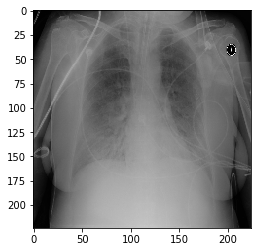

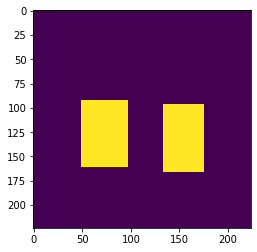

In [106]:
n=290
print(train_image.shape)
print(train_mask.shape)

plt.imshow(train_image[n])
plt.show()
plt.imshow(train_mask[n])

# Create a Model

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import h5py

In [19]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(224, 224, 3),
              alpha=1.0,
              depth_multiplier=1,
              dropout=1e-3,
              include_top=True,
              weights='imagenet',
              input_tensor=None,
              pooling=None,
              classes=1000)
    for layer in model.layers:
        layer.trainable = trainable


        # Add all the UNET layers here
        #### Add your code here ####
    block0 = model.get_layer("conv_pw_1_relu").output 
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    #x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((224, 224))(x)

    # model = Model(input = inputs, output = x)
    # model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    # if(pretrained_weights):
    #   model.load_weights(pretrained_weights)

    return Model(inputs=model.input, outputs=x)



# Model Summary

In [51]:
model = create_model(False)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
____________________________________________________________________________________________

# Model to graph (Colab it is working fine).

In [56]:

import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='./model.png', show_shapes=False, show_layer_names=False,
    rankdir='TB', expand_nested=False, dpi=96)
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


# Define Dice Coefficient

In [21]:
def dice_coefficient(y_true, y_pred):
  
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)
  return numerator / (denominator + tf.keras.backend.epsilon())

# Define Loss

In [22]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

# Define Optimizers

In [23]:
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

# Store the Weights

In [ ]:
mc1 = ModelCheckpoint('/Users/sk665824/Desktop/Great Learning/CapstoneProject/rsna_pneumonia_detection_challenge/Capstone_best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)
#mc1 = ModelCheckpoint(rootDir +'Capstone_best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")

In [24]:
print(train_image.shape)

(26684, 224, 224, 3)


In [25]:
print(train_mask.shape)

(26684, 224, 224)


In [26]:
len(train_mask)

26684

# Execute the Fit Model

In [ ]:
import tensorflow as tf

history=model.fit(x=train_image, y=train_mask,
          callbacks=[mc1, stop],
          batch_size=4,
          epochs=2,
          use_multiprocessing=True,
          validation_split=0.2,
          verbose=1)

import tensorflow as tf
history= model.fit(
    x=train_image,
    y=train_mask,
    batch_size=1,    
    epochs=1,
    callbacks=[mc1]
    #validation_data=(X_valid, y_valid),
    #validation_data=X_valid,
    )

# Define the Loss graph

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
#test_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

#pred_mask = model.predict(sample_image)
#path = /Users/sk665824/Desktop/Great Learning/CapstoneProject/stage_2_train_jpg/{patient_id}.jpg
n=290
sample_image=train_image[n]

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([sample_image]))[0] > 0.5), (224,224))
#print(pred_mask)
plt.imshow(train_image[n])
plt.show()
plt.imshow(pred_mask)

# Store all the test images to a dataframe

In [27]:
PathDicom = "./stage_2_test_jpg/"
JPGFile_test = []  
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        #if ".jpg" in filename.lower():  # check whether the file's Images
        #print(filename)
        img=cv2.imread(PathDicom + filename)
        #print(img)
        #img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
        img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
        JPGFile_test.append((filename))

JPGFile_test=np.array(JPGFile_test)
            

In [28]:
print(JPGFile_test[2100])

250d9e6f-afbb-4188-b61c-50e669ded9d2.jpg


# Using weights trained on 26,000 images to predict pneumonia for test image.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


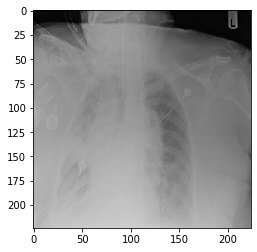

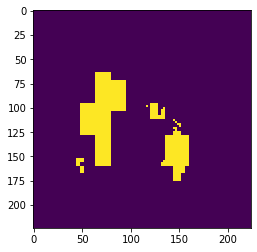

In [93]:

model.load_weights('/Users/sk665824/Desktop/Great Learning/CapstoneProject/rsna_pneumonia_detection_challenge/Capstone_best_model_17Jul.h5')
n=300
sample_image=JPGFile_test[n]
#sample_image = "./stage_2_test_jpg/22cbd2b2-3229-4e59-93fc-e271f4d4119a.jpg"

img=cv2.imread(f"./stage_2_test_jpg/{sample_image}")
img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([img]))[0] > 0.5), (224,224))

print(pred_mask)
#pred_mask=model.predict(sample_image)
plt.imshow(img)
plt.show()
plt.imshow(pred_mask)

# Using weights trained on 6012 images to predict pneumonia for test image.

from tensorflow.keras.models import Model
model.load_weights('/Users/sk665824/Desktop/Great Learning/CapstoneProject/Capstone_best_model_6000_VL_min_20200718.h5')
n=300
sample_image=JPGFile_test[n]
#sample_image = "./stage_2_test_jpg/22cbd2b2-3229-4e59-93fc-e271f4d4119a.jpg"

img=cv2.imread(f"./stage_2_test_jpg/{sample_image}")
img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([img]))[0] > 0.5), (224,224))

print(pred_mask)
#pred_mask=model.predict(sample_image)
plt.imshow(img)
plt.savefig('img.png')
plt.show()
plt.imshow(pred_mask)
plt.savefig('pred_mask.png')

# Defining all the functions for the bounding boxes
1. Predict the pneumonia image based on the model weights.

In [94]:

# Definition for the Prediction.

def prediction(test_image):
  y = np.expand_dims(test_image, axis=0)
  prediction=model.predict(y)
  pred= (prediction > 0.5).astype(np.uint8)
  m=pred[0]
  return(m)





# Definition for the drawing a box.
1. Bounding boxes are drawn based on the predicted image. 

In [ ]:

def draw_bbox(img,left1,right1,bottom1,top1,left2,right2,bottom2,top2,predd):
  img=img
  if(predd==True):
    k=cv2.rectangle(img,(left1,bottom1),(right1,top1),(0,0,225),1)
    k=cv2.rectangle(k,(left2,bottom2),(right2,top2),(0,0,225),1)
  if(predd==False):
    k=cv2.rectangle(img,(left1,bottom1),(right1,top1),(225,0,0),1)
    k=cv2.rectangle(k,(left2,bottom2),(right2,top2),(225,0,0),1)
  return(k)

# Definition for drawing a bounding box.
1. The function would define the Max & Min values for the bounding boxes.
2. Also, this function would define the Height & Width(Top & Bottom) of a bounding box.

In [ ]:


def bbox(m):

  x1=[]
  y1=[]
  x2=[]
  y2=[]
  for i in range(223):
    for j in range(0,113):
      if m[i][j] == 1:
        x1.append(i)
        y1.append(j)

  for i in range(223):
    for j in range(113,223):
      if m[i][j] == 1:
        x2.append(i)
        y2.append(j)
  top1=min(x1)
  bottom1=max(x1)
  left1=min(y1)
  right1=max(y1)
  top2=min(x2)
  bottom2=max(x2)
  left2=min(y2)
  right2=max(y2)
  return(left1,right1,bottom1,top1,left2,right2,bottom2,top2)


# Correcting the bounding boxes in the image.
1. Shaping out the traces identified in the image and correcting them using the Hieght, Width, Max and Min values of the prediction. 

In [ ]:


def correct_mask(left1,right1,bottom1,top1,left2,right2,bottom2,top2):
  z=np.zeros((224,224),np.uint8)
  z=np.array(z,dtype=float)
  z[int(top1):int(bottom1), int(left1):int(right1)] = 1
  z[int(top2):int(bottom2), int(left2):int(right2)] = 1
  return(z)

# Intersection Over Union Score for the Mask

In [95]:
from sklearn.metrics import jaccard_similarity_score
def iou(z,mask):
  jac = jaccard_similarity_score(z, mask)
  return(round(jac,2))

In [96]:
 def iou(z,mask):
   jac = jaccard_similarity_score(z, mask)
   return(jac)

# Sample execution on the bounding boxes

(26684, 224, 224, 3)
(26684, 224, 224)


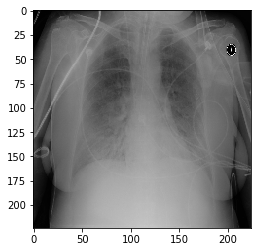

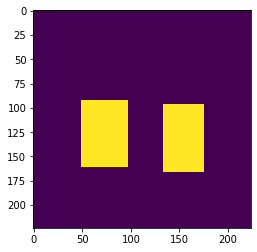

In [107]:
m=290
print(train_image.shape)
print(train_mask.shape)
#print(pid[n])
plt.imshow(train_image[m])
plt.show()
plt.imshow(train_mask[m])

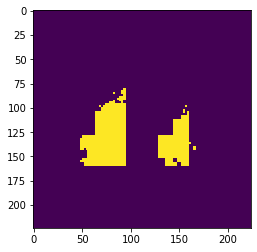

In [108]:
inf_image=train_image[m]
mask=train_mask[m]
predicted_mask=prediction(inf_image)
plt.imshow(predicted_mask)

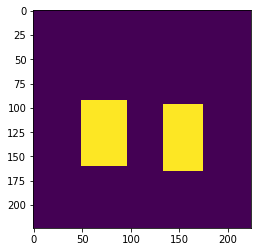

In [113]:
corrected_mask=correct_mask(left1,right1,bottom1,top1,left2,right2,bottom2,top2)
plt.imshow(corrected_mask)

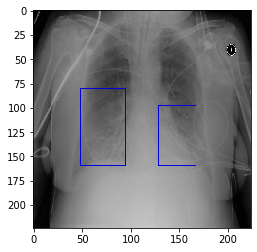

0.9860207819391492


/Users/sk665824/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


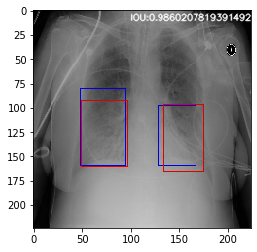

In [112]:
image1=inf_image
image2=inf_image
left1,right1,bottom1,top1,left2,right2,bottom2,top2=bbox(predicted_mask)
final_prediction=draw_bbox(image1,left1,right1,bottom1,top1,left2,right2,bottom2,top2,predd=True)
plt.imshow(final_prediction)
plt.show()


left1,right1,bottom1,top1,left2,right2,bottom2,top2=bbox(mask)
org_withbox=draw_bbox(image2,left1,right1,bottom1,top1,left2,right2,bottom2,top2,predd=False)

font = cv2.FONT_HERSHEY_SIMPLEX 
 
org = (100, 10) 
  
# fontScale 
fontScale = 0.3
   
# Blue color in BGR 
color = (255, 255, 255) 
  
# Line thickness of 2 px 
thickness = 1
   
# Using cv2.putText() method 


corrected_mask=correct_mask(left1,right1,bottom1,top1,left2,right2,bottom2,top2)
iou_score=iou(corrected_mask,mask)
print(iou_score)

image = cv2.putText(org_withbox, "IOU:" + str(iou_score), org, font,fontScale, color, thickness, cv2.LINE_AA) 
plt.imshow(org_withbox)